# 판다스

1. 설치해야 하는 라이브러리
2. 자료구조 : 시리즈, 데이터프레임

In [2]:
import pandas as pd

# 1. 데이터 읽기

In [4]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [13]:
df.head() #위의 5건 출력 - default : subset

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## 1.1 데이터프레임 이해하기

In [10]:
df.shape # (row, col) / (건수, 항목수)

(1704, 6)

In [14]:
df.columns #열을 식별하는 idex, list로 

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [15]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

EDA 탐색적 데이터 분석 - shape, columns, dtypes

null : 값이 없는 것
dtype object : str

In [17]:
df.info()  #객체.의 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## 1.2 데이터 추출 - subset

### 1.2.1 열 추출

In [18]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [19]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [32]:
type(df['country'])  #시리즈객체

pandas.core.series.Series

In [21]:
df1 = df['country']
df1.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [31]:
df[ ['country', 'continent'] ]   # [속성목록]을 이용해서 데이터프레임 추출

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [25]:
#보고싶은 컬럼 4개를 추출한 서브셋 생성
df2 = df[ ['country', 'year', 'lifeExp', 'pop'] ]
df2.head()

,country,year,lifeExp,pop
0,Afghanistan,1952,28.801,8425333
1,Afghanistan,1957,30.332,9240934
2,Afghanistan,1962,31.997,10267083
3,Afghanistan,1967,34.020,11537966
4,Afghanistan,1972,36.088,13079460


In [26]:
type(df1), type(df2)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### 1.2.2 행 추출 

1. loc [행 이름] / default rangeindex > number / 인덱스의 이름을 변경 > 이름으로 추출
3. iloc [행 번호]

In [27]:
df.loc[ 0 ] 

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [30]:
#100번째 행 추출
df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [34]:
# - index : 지원하지 않은
    # df.loc[-1]

df.shape[0]  #raw 수 # 1704개

df.loc[ df.shape[0] -1 ]  #전체 raw에서 -1 > 1703번째

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [35]:
#여러 행 추출 > [] 로 지정
df.loc[ [0,1,4] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [36]:
#현재 데이터프레임에서는 loc[] iloc[] 동일
df.iloc[ [0,1,4] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
# 행, 열을 같이 지정해서 추출 ','로 구분
# loc[], iloc[]의 차이는 컬럼을 꺼내는 방식

df.loc[ [0], ['country'] ] 

,country
0,Afghanistan


In [41]:
df.iloc[ [0], [0] ] 

,country
0,Afghanistan


In [43]:
# slicing > : (colon)
df.loc[ : , ['country'] ]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1699,Zimbabwe
1700,Zimbabwe
1701,Zimbabwe
1702,Zimbabwe


In [97]:
df.loc[ :10 , ['country'] ]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


In [96]:
df.iloc[ :11 , [0] ]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


### 1.2.3 range()

In [51]:
r_list = list( range(1,5) )
df.iloc[ :, r_list]

,continent,year,lifeExp,pop
0,Asia,1952,28.801,8425333
1,Asia,1957,30.332,9240934
2,Asia,1962,31.997,10267083
3,Asia,1967,34.020,11537966
4,Asia,1972,36.088,13079460
...,...,...,...,...
1699,Africa,1987,62.351,9216418
1700,Africa,1992,60.377,10704340
1701,Africa,1997,46.809,11404948
1702,Africa,2002,39.989,11926563


In [52]:
l_list = list(range(1,5,2))  #step 사용
df.iloc[ :, l_list]

,continent,lifeExp
0,Asia,28.801
1,Asia,30.332
2,Asia,31.997
3,Asia,34.020
4,Asia,36.088
...,...,...
1699,Africa,62.351
1700,Africa,60.377
1701,Africa,46.809
1702,Africa,39.989


In [53]:
# :을 이용한 slicing 구문
df.iloc[ :, 0:6:2] #전체행, 시작:끝:스텝

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [98]:
df.iloc[ :11, [-1] ]  # list에서는 -1 허용 되기에

,gdpPercap
0,779.445314
1,820.853030
2,853.100710
3,836.197138
4,739.981106
5,786.113360
6,978.011439
7,852.395945
8,649.341395
9,635.341351


## 기초 통계 계산하기
 - descriptive - numeric data

In [66]:
#전체 데이터의 요약
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [69]:
#그룹화 > df 분할 > 통계
# ex, 연도별 기대수명 평균 / 대륙별 국가 갯수

df.groupby('year')
df.groupby('year')['lifeExp']  # [보고싶은 컬럼]
df.groupby('year')['lifeExp'].mean()  #.적용할 함수()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [81]:
#대륙별 인구의 최대값
df.groupby('continent')['pop'].max().sort_index(ascending=False)
                                    #sort_index() : 정렬
                                    #sort_index(ascending=False) : index 기준 역순

continent
Oceania       20434176
Europe        82400996
Asia        1318683096
Americas     301139947
Africa       135031164
Name: pop, dtype: int64

In [87]:
#최대값 기준 정렬
df.groupby('continent')['pop'].max().sort_values(ascending=False)

continent
Asia        1318683096
Americas     301139947
Africa       135031164
Europe        82400996
Oceania       20434176
Name: pop, dtype: int64

In [101]:
#빈도수 계산 : nunique() 
#중복 제거
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [99]:
#value_counts()
df.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: count, Length: 142, dtype: int64

### 1.3 그래프로 그리기

In [93]:
year_lifeExp_mean = df.groupby('year')['lifeExp'].mean()
year_lifeExp_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<Axes: xlabel='year'>

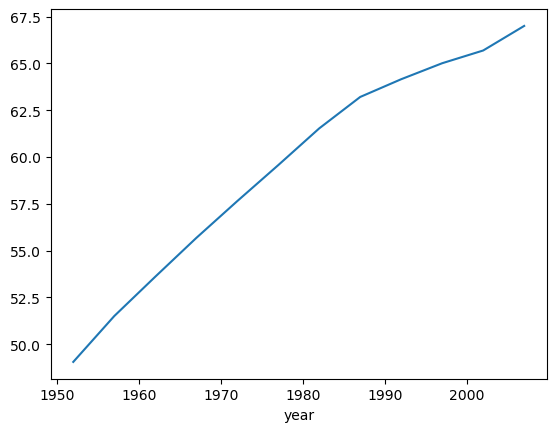

In [95]:
year_lifeExp_mean.plot()

#year(index) : x축
#값 : y축

# 2. 데이터 다루기

## 2.1 시리즈 만들기
 - 1차원 자료 : 리스트 유사, 넘파이의 어레이를 기본으로 만들어짐
 - 한 열의 데이터는 모두 동일한 타입

In [37]:
import pandas as pd

In [14]:
# 시리즈 생성 > 리스트 형식으로
# RangeIndex 생성됨

s = pd.Series( ['banana', 10] )
s, type(s)

(0    banana
 1        10
 dtype: object,
 pandas.core.series.Series)

In [13]:
# RangeIndex 변경 가능

s1 = pd.Series( data=['홍길동', '김길동'], index=['a', 'b'])
s1

a    홍길동
b    김길동
dtype: object

In [15]:
s1.head()

a    홍길동
b    김길동
dtype: object

In [16]:
s1.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, a to b
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [17]:
s1.loc['a']

'홍길동'

In [18]:
s1.iloc[0]

'홍길동'

## 2.2 데이터프레임 만들기

In [20]:
scientists = pd.DataFrame({
        "Name": ["Rosaline Franklin", "William Gosset"],
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
})

In [21]:
scientists.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [22]:
scientists

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [35]:
# name column 을 인덱스로 지정해서 데이터 프레임 생성하기

scientists.index = ["Rosaline Franklin", "William Gosset"]
scientists

,Name,Occupation,Born,Died,Age
Rosaline Franklin,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [39]:
f_row = scientists.loc["Rosaline Franklin"] 
f_row.values

array(['Rosaline Franklin', 'Chemist', '1920-07-25', '1958-04-16', 37],
      dtype=object)

In [28]:
f_row.index

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [29]:
f_row.keys()

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [40]:
scientists.loc[:,'Age']

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [42]:
# series - enarray속성 가지고 있으므로, 함수 사용 가능
age = scientists['Age']
age.mean(), age.max(), age.min()

(49.0, 61, 37)

In [53]:
# series data 추출

scient2 = pd.read_csv('./data/scientists.csv')
scient2

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [48]:
ages = scient2['Age']
ages, type(ages)

(0    37
 1    61
 2    90
 3    66
 4    56
 5    45
 6    41
 7    77
 Name: Age, dtype: int64,
 pandas.core.series.Series)

In [50]:
# 기술통계량 확인, ages.mean()
ages.describe()

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [52]:
# 조건값으로 추출
ages[ ages > ages.mean() ]   # 백터화, 불리언값 리스트

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [59]:
# element wise - vector + vector : rank1 array
ages + ages, ages * ages

(0     74
 1    122
 2    180
 3    132
 4    112
 5     90
 6     82
 7    154
 Name: Age, dtype: int64,
 0    1369
 1    3721
 2    8100
 3    4356
 4    3136
 5    2025
 6    1681
 7    5929
 Name: Age, dtype: int64)

In [58]:
# vector + scalar > broadcasting
ages + 10

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [60]:
s1 = pd.Series( [1,100] )
s1

0      1
1    100
dtype: int64

In [61]:
# vector 차원은 동일, 길이 다를 시 > numpy broadcasting과 차이
# 반드시 vector 길이가 같아야 함
s1 + ages

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

## 2.3 인덱스

In [63]:
# default 는 index 기준 정렬
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [65]:
# 역순 정렬
rev_ages = ages.sort_index(ascending=False)
rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [66]:
ages*2

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [67]:
# index 정렬이 다른 경우, 같은 인덱스 기준으로 정렬 후 연산 수행 > 기존 정렬 방식
ages + rev_ages

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [91]:
first_half = scient2[:4]
second_half = scient2[4:]
pd.concat( [first_half, second_half] )

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0


In [70]:
# 데이터프레임에 스칼라 연산 - column type 따라 연산
scient2*2

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


In [71]:
# 숫자로 구성한 데이터프레임의 더하기 연산 +, add()
# df1, df2에 동일 값 할당 후 더하기 
df1 = df2 = pd.DataFrame(
                data = [ [1,2,3],[4,5,6] ]
            )
df1.add(df2)

,0,1,2
0,2,4,6
1,8,10,12


## 2.4 열 추가

In [73]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [74]:
# str(object) > datetime
# tp_datetime( vector, 정렬방식)
born_datetime = pd.to_datetime( scient2['Born'], format='%Y-%m-%d' )
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [104]:
# 기존 data에 datetime 방식 넣어주기
scient2['born_dt'] = born_datetime
scient2.head(3)

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0


In [105]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   born_dt     8 non-null      datetime64[ns]
 6   died_dt     8 non-null      datetime64[ns]
 7   age_days    8 non-null      float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 644.0+ bytes


In [106]:
died_datetime = pd.to_datetime( scient2['Died'], format='%Y-%m-%d' )
scient2['died_dt'] = died_datetime

In [107]:
scient2['age_days'] = scient2['died_dt'] - scient2['born_dt']
scient2['age_days'].dt.days

0    13779
1    22404
2    32964
3    24345
4    20777
5    16529
6    15324
7    28422
Name: age_days, dtype: int64

In [108]:
scient2['age_days'].dt.days / 365

0    37.750685
1    61.380822
2    90.312329
3    66.698630
4    56.923288
5    45.284932
6    41.983562
7    77.868493
Name: age_days, dtype: float64

In [109]:
# series 객체 > ()참조를 통해.apply(함수)
import numpy as np

scient2['age_days'] = (scient2['age_days'].dt.days / 365).apply(np.floor)
scient2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0


In [115]:
# df.assign( col_name = 수식 ), col_name은 새로 만들어짐.
# 내가 가지고 있는 데이터(scient2)에 할당값을 넣어줘
# return 후 원본에 할당

scient2 = scient2.assign(
    age_days_assign = scient2['died_dt'] - scient2['born_dt'],
    age_assign = ((scient2['died_dt'] - scient2['born_dt']).dt.days / 365).apply(np.floor)
)
scient2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0,28422 days,77.0


## 2.5 열 삭제

In [116]:
# default 가 행이기 때문에, 축 값 삭제시 지정
# .drop - copy (원본은 삭제되지 않음) > return 만

scient3_d = scient2.drop( ['Age'], axis='columns' )
scient3_d

,Name,Born,Died,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,37.0,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,61.0,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,90.0,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,66.0,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,56.0,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,45.0,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,41.0,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,77.0,28422 days,77.0


In [ ]:
# inplace=True : drop 후 원본에 엎는다
scient2.drop( ['Age'], axis='columns', inplace=True )

## 2.6 파일 저장
  - 피클로 저장(객체화)
  - 파이썬의 데이터파일 형식 : 바이너리 저장/읽기 , .pickle/ .pkl/ .p
  - 시리즈, 데이터프레임 저장
  - csv, tsv, excel 지원
  - to_csv(), read_csv()
  - excel > openpyxl 설치 필요
  - pip install openpyxl

In [119]:
# series 객체 저장 > to_pickle(저장경로/파일이름)
scient2['Name'].to_pickle('./data/scientist_names_series.pickle')

In [124]:
#피클 파일에서 읽어오기
series_pkl = pd.read_pickle('./data/scientist_names_series.pickle')
series_pkl

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [125]:
#데이터프레임을 저장, 다시 읽어오기
scient2.to_pickle('./data/scientist_df.pickle')

In [126]:
pd.read_pickle('./data/scientist_df.pickle')

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0,28422 days,77.0


In [127]:
#csv로 저장
scient2.to_csv('./data/scientist_df.csv')

In [129]:
scient2_csv_df = pd.read_csv('./data/scientist_df.csv')
type(scient2_csv_df)

pandas.core.frame.DataFrame

In [130]:
scient2.head(2)

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0,22404 days,61.0


In [131]:
# dictionary
sci_dict = scient2.to_dict()
sci_dict

{'Name': {0: 'Rosaline Franklin',
  1: 'William Gosset',
  2: 'Florence Nightingale',
  3: 'Marie Curie',
  4: 'Rachel Carson',
  5: 'John Snow',
  6: 'Alan Turing',
  7: 'Johann Gauss'},
 'Born': {0: '1920-07-25',
  1: '1876-06-13',
  2: '1820-05-12',
  3: '1867-11-07',
  4: '1907-05-27',
  5: '1813-03-15',
  6: '1912-06-23',
  7: '1777-04-30'},
 'Died': {0: '1958-04-16',
  1: '1937-10-16',
  2: '1910-08-13',
  3: '1934-07-04',
  4: '1964-04-14',
  5: '1858-06-16',
  6: '1954-06-07',
  7: '1855-02-23'},
 'Age': {0: 37, 1: 61, 2: 90, 3: 66, 4: 56, 5: 45, 6: 41, 7: 77},
 'Occupation': {0: 'Chemist',
  1: 'Statistician',
  2: 'Nurse',
  3: 'Chemist',
  4: 'Biologist',
  5: 'Physician',
  6: 'Computer Scientist',
  7: 'Mathematician'},
 'born_dt': {0: Timestamp('1920-07-25 00:00:00'),
  1: Timestamp('1876-06-13 00:00:00'),
  2: Timestamp('1820-05-12 00:00:00'),
  3: Timestamp('1867-11-07 00:00:00'),
  4: Timestamp('1907-05-27 00:00:00'),
  5: Timestamp('1813-03-15 00:00:00'),
  6: Timesta

In [132]:
# dict -> dataframe 변환
sci_dict_df = pd.DataFrame.from_dict(sci_dict)
sci_dict_df

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0,28422 days,77.0


In [137]:
# dataframe -> json(외부) 변환
sci_json = scient2.to_json(orient='records', indent=2, date_format='iso')  #(조건사항추가)
sci_json

'[\n  {\n    "Name":"Rosaline Franklin",\n    "Born":"1920-07-25",\n    "Died":"1958-04-16",\n    "Age":37,\n    "Occupation":"Chemist",\n    "born_dt":"1920-07-25T00:00:00.000",\n    "died_dt":"1958-04-16T00:00:00.000",\n    "age_days":37.0,\n    "age_days_assign":"P13779DT0H0M0S",\n    "age_assign":37.0\n  },\n  {\n    "Name":"William Gosset",\n    "Born":"1876-06-13",\n    "Died":"1937-10-16",\n    "Age":61,\n    "Occupation":"Statistician",\n    "born_dt":"1876-06-13T00:00:00.000",\n    "died_dt":"1937-10-16T00:00:00.000",\n    "age_days":61.0,\n    "age_days_assign":"P22404DT0H0M0S",\n    "age_assign":61.0\n  },\n  {\n    "Name":"Florence Nightingale",\n    "Born":"1820-05-12",\n    "Died":"1910-08-13",\n    "Age":90,\n    "Occupation":"Nurse",\n    "born_dt":"1820-05-12T00:00:00.000",\n    "died_dt":"1910-08-13T00:00:00.000",\n    "age_days":90.0,\n    "age_days_assign":"P32964DT0H0M0S",\n    "age_assign":90.0\n  },\n  {\n    "Name":"Marie Curie",\n    "Born":"1867-11-07",\n    "

In [138]:
# pprint : raw 형식의 데이터출력 형식 지정
import pprint
pprint.pprint(sci_json)

('[\n'
 '  {\n'
 '    "Name":"Rosaline Franklin",\n'
 '    "Born":"1920-07-25",\n'
 '    "Died":"1958-04-16",\n'
 '    "Age":37,\n'
 '    "Occupation":"Chemist",\n'
 '    "born_dt":"1920-07-25T00:00:00.000",\n'
 '    "died_dt":"1958-04-16T00:00:00.000",\n'
 '    "age_days":37.0,\n'
 '    "age_days_assign":"P13779DT0H0M0S",\n'
 '    "age_assign":37.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"William Gosset",\n'
 '    "Born":"1876-06-13",\n'
 '    "Died":"1937-10-16",\n'
 '    "Age":61,\n'
 '    "Occupation":"Statistician",\n'
 '    "born_dt":"1876-06-13T00:00:00.000",\n'
 '    "died_dt":"1937-10-16T00:00:00.000",\n'
 '    "age_days":61.0,\n'
 '    "age_days_assign":"P22404DT0H0M0S",\n'
 '    "age_assign":61.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"Florence Nightingale",\n'
 '    "Born":"1820-05-12",\n'
 '    "Died":"1910-08-13",\n'
 '    "Age":90,\n'
 '    "Occupation":"Nurse",\n'
 '    "born_dt":"1820-05-12T00:00:00.000",\n'
 '    "died_dt":"1910-08-13T00:00:00.000",\n'
 '    "age_days":90.0,\n

In [ ]:
#json > df
#dataframe 이용해 다양한 파일의 형식을 변환

df_json = pd.read_json(sci_json)

In [ ]:
sci_json.to_pickle('./data/sci_json.df')

# 3. 데이터 전처리

## 3.1 깔끔한 데이터

1. 열 이름 : 변수 > but 값이 온 경우, 1개가 아닌 여러개

In [1]:
import pandas as pd
pew = pd.read_csv('./data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [4]:
# 분산되어 있는 컬럼을 하나로 합친다 > wide data 를 long data로 만들기
# 하나의 컬럼으로 합치기 > 언피봇(피봇되돌리기) > melt()
# melt : 기준이되는 것의 열이 하나씩 들어감.

# id vars : 기준이 되는, var_name : 새로생긴 열 이름, value 이름 재 할당 
pew_long = pew.melt(id_vars = 'religion', var_name = 'income', value_name='count')
                    #컬럼 여러개는 리스트로

In [5]:
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [8]:
billboard = pd.read_csv('./data/billboard.csv')
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
billboard.melt(id_vars = ['year','artist'])

,year,artist,variable,value
0,2000,2 Pac,track,Baby Don't Cry (Keep...
1,2000,2Ge+her,track,The Hardest Part Of ...
2,2000,3 Doors Down,track,Kryptonite
3,2000,3 Doors Down,track,Loser
4,2000,504 Boyz,track,Wobble Wobble
...,...,...,...,...
25038,2000,Yankee Grey,wk76,NaN
25039,2000,"Yearwood, Trisha",wk76,NaN
25040,2000,Ying Yang Twins,wk76,NaN
25041,2000,Zombie Nation,wk76,NaN


In [12]:
# 열이름 var(변수), data 포함되어 있음
evola = pd.read_csv('./data/country_timeseries.csv')
evola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [17]:
evola_long = evola.melt(id_vars = ['Date', 'Day'])
evola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [19]:
#Variable열 꺼내기
var_split = evola_long.variable.str.split('_')
                   #문자열로 _으로 나눠
type(var_split)

pandas.core.series.Series

In [23]:
status_values = var_split.str.get(0)
country_values = var_split.str.get(1)
# 동일 var_split = evola_long.variable.str.split('_', expand=True)
status_values

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [24]:
country_values

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [26]:
#dataframe에 나눈 것 추가
evola_long['status'] = status_values
evola_long['country'] = country_values

In [28]:
evola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali
